[Click here for Youtube Recording](https://www.youtube.com/watch?v=sozmMWl_xT0)

# **What is an Agent?**
An agent refers to an AI system that performs tasks autonomously, often using advanced techniques like planning, tool use, reflection, and collaboration with other agents.
Agents are more sophisticated than simple AI models that respond to a single prompt (like zero-shot prompting).
Instead, agents take high-level instructions and break them down into multiple steps, interacting with different tools or systems to achieve a goal, much like a human agent carrying out tasks in an iterative and purposeful manner.

For example, instead of just answering a question in one step, an agent might plan a series of actions, access external tools, gather more information, and execute a series of tasks to reach a more complex or refined outcome.

<img src="./agentic_system.png" alt="Simple Graph" width = "600px">

As per Andew Ng, Rather than arguing over which work to include or exclude as being a true agent, we can acknowledge that there are different degrees to which systems can be agentic.
Furthermoe, he also emphasize that rather than calling noun 'Agent' it is better to use adjective 'Agentic'.

This way all the systems falling in the spectrum ahead of zero shot prompting can be included in agentic systems.
**REFERENCE** [What is an Agent](https://www.deeplearning.ai/the-batch/issue-253/)

# **Agentic Design Patterns**
In zero shot mode, LLM output token by token. This is similar to a human writing an essay without using backspace.

With an agent workflow, however, we can ask the LLM to iterate over a document many times. For example, it might take a sequence of steps such as:

* Plan an outline.
* Decide what, if any, web searches are needed to gather more information.
* Write a first draft.
* Read over the first draft to spot unjustified arguments or extraneous information.
* Revise the draft taking into account any weaknesses spotted.
And so on.

*Same LLMs, with this iterative workflow give better results than zero shot prompting.*

Following are four agentic design patterns suggested by **Andrew Ng**.
1. **Reflection:** The LLM examines its own work to come up with ways to improve it.
2. **Tool Use:** The LLM is given tools such as web search, code execution, or any other function to help it gather information, take action, or process data.
3. **Planning:** The LLM comes up with, and executes, a multistep plan to achieve a goal (for example, writing an outline for an essay, then doing online research, then writing a draft, and so on).
4. **Multi-agent collaboration:** More than one AI agent work together, splitting up tasks and discussing and debating ideas, to come up with better solutions than a single agent would.
**REFERENCE:** [Agentic Design Patterns by Andrew Ng](https://www.deeplearning.ai/the-batch/how-agents-can-improve-llm-performance/?ref=dl-staging-website.ghost.io)

## **1. Reflection:**
Instead of having an LLM generate its final output directly, an agentic workflow prompts the LLM multiple times, giving it opportunities to build step by step to higher-quality output.

**Example-1:** A human writing an essay will write a line, read it again, think over it and may improve it.

Normally people give a prompt to LLM, and if the response is not as per the requirement, a follow-up prompt is given. In response to the follow-up prompt, the LLM might spot errors in first response and generate a better response now.

This self-reflection process allows the LLM to spot gaps and improve its output on a variety of tasks including producing code, writing text, and answering questions.

## **2. Tools Use:**
Tool Use is a key design pattern of AI agentic workflows. In this design patterb, LLM is given functions it can request to call for gathering information, taking action, or manipulating data.

In agentic workflows, tools are external functions or systems that the LLM (Large Language Model) can call to gather information, perform tasks, or manipulate data in real-time.

**Tool Examples:** Web Search Tool, Code Execution Tool, External Microservices, APIs

## **3. Planning:**
Planning is a key agentic AI design pattern in which we use a large language model (LLM) to autonomously decide on what sequence of steps to execute to accomplish a larger task. For example, if we ask an agent to do online research on a given topic, we might use an LLM to break down the objective into smaller subtasks, such as researching specific subtopics, synthesizing findings, and compiling a report.

Yes, the **chain of thought (CoT)** concept can be included in the **planning** process of agentic AI design. In fact, it aligns well with the idea of breaking down complex tasks into smaller steps. Here's how:

### **Chain of Thought in Planning:**
- **Chain of Thought** is a reasoning technique where the model is encouraged to **explicitly think through intermediate steps** when answering a question or solving a problem, rather than jumping straight to the final answer.
  
- When an agent is tasked with a more complex goal (like conducting online research or executing multiple actions), the **planning** process can benefit from a **chain of thought** approach, where the LLM reasons through the steps involved.

- **Example:** If an agent is tasked with researching a topic, the **planning** process could involve:
  1. **Breaking down the task** into subtopics.
  2. **Deciding the order** in which to research those subtopics.
  3. **Identifying the tools** or actions needed for each subtask (e.g., web search, data gathering).
  4. **Synthesizing** the findings and summarizing them.

By explicitly laying out these intermediate steps (as in chain of thought reasoning), the agent can methodically and thoughtfully approach each part of the task, improving its overall performance and reliability in handling more complex, multi-step objectives.

## **4. Multi-Agent Collaboration:**

Multi-agent collaboration is a design pattern in AI where different agents (or roles) work together to complete a complex task by dividing it into smaller subtasks.

For example, when building software, you might have different agents handle roles like coding, designing, and quality assurance. Even though you may be using the same large language model (LLM), each agent focuses on its specific role by being prompted in a certain way, like asking one agent to write efficient code and another to design an interface.

This approach works well because it breaks down complicated tasks into manageable pieces. Each agent can handle its own part more effectively, and the results from different agents can be combined to solve the entire problem. Frameworks like AutoGen, Crew AI, and LangGraph make it easier to build multi-agent systems.


# **Introduction to LangGraph**
## **Graph**

In **computer science**, graph structure is a mathematical representation of relationships between different objects.

LangGraph models agent workflows as graphs. You define the behavior of your agents using three key components:

### **1. State:**
A shared data structure that represents the current snapshot of your application. It can be any Python type, but is typically a TypedDict or Pydantic BaseModel.

State is to keep track of all the activities of agentic system. It can also be considered as the record of the agentic activities happening in agentic workflow (Graph).
The nodes (agents/tools) in the graph updates the state. State is defined as dictionary. Everytime node performs an activity, it updates its output/response in the state. There is flexibility how the states are written. Node output can simply be overwritten or it can be appended in the dictionary.

### **2. Nodes:**
Python functions that encode the logic of your agents. They receive the current State as input, perform some computation or side-effect, and return an updated State.

### **3. Edges:**
Python functions that determine which Node to execute next based on the current State. They can be conditional branches or fixed transitions.

Edges are relationships/connections between nodes. Edges links the nodes together. Edges determines the sequence of the events.
There are four types of edges.
    
* **Normal Edges:** A straight forward connection where one node provides output to other node in sequence. If you always want to go from node A to node B, you can use the `add_edge` method directly.
* **Conditional Edges:** If you want to optionally route to 1 or more edges (or optionally terminate), you can use the `add_conditional_edges` method. This method accepts the name of a node and a "routing function" to call after that node is executed
* **Entry Point:** The entry point is the first node(s) that are run when the graph starts. You can use the `add_edge` method from the virtual `START` node to the first node to execute to specify where to enter the graph.
* **Conditional Entry Point:** A conditional entry point lets you start at different nodes depending on custom logic. You can use `add_conditional_edges` from the virtual `START` node to accomplish this.
  



[Introduction to LangGraph (Slides)](https://files.cdn.thinkific.com/file_uploads/967498/attachments/ecd/3cc/6d3/LangChain_Academy_-_Introduction_to_LangGraph_-_Motivation.pdf)

Pillars in LangGraph to increase the reliability with more control.
* Persistence
* Streaming
* Human-in-the-loop
* Controllability

Benefits of LangGraph
* Simplifies development (state management, agent coordination)

## **Example: A Simple Graph**

In [ ]:
%%capture --no-stderr
%pip install -qU langgraph

### **1. Create a State:**
* First of all, we define the state.
* For State schema, we use TypedDict. However, Pydantic Base Model can also be used.
* TypedDict is used to provide type safety for keys and values to the state dictionary.
* The schema of the State will be the input schema to all Nodes and Edges in the graph.

**Note:** *State takes another parameter (optional), a reducer function, which defines how the state will be updated by nodes.*

In [ ]:
# Define the State schema
from typing_extensions import TypedDict

class State (TypedDict):
    graph_state:str

### **2. Create Nodes:**
Nodes are just python functions where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).
* The first positional argument is the state, as defined above.
* Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].
* Each node returns a new value of the state key graph_state.
* By default, the new value returned by each node will override the prior state value. If we don't want this behaviour, we have to define reducer funciton in State schema that will define the behaviour how nodes updates the state.


In [ ]:
# Create python function for Node-1

def node_1(state:State):
    print("--Node-1--")
    return {"graph_state":state['graph_state']+' I am'}

# Create python function for Node-2
def node_2(state:State):
    print("--Node-2--")
    return {"graph_state":state['graph_state']+' sad'}

# Create python function for Node-3
def node_3(state:State):
    print("--Node-3--")
    return {"graph_state":state['graph_state']+' happy'}

print(node_1({"graph_state":"5"}))



--Node-1--
{'graph_state': '5 I am'}


### **3. Create Edges:**
* Edges connect the nodes.
* Normal Edges are used if you want to always go from, for example, node_1 to node_2.
* Conditional Edges are used want to optionally route between nodes.
* Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [ ]:
import random
from typing import Literal

# Define the function for condition logic.
# This condition function will decide which node to execute next.
def decide_mood(state) -> Literal['usman_node_2','ibtisam_node_3']:
    print("--Decide Moode--")
    user_input = state['graph_state']
    if random.random() < 0.5:
        return 'ibtisam_node_3'
    return 'usman_node_2'

### **4. Build Graph:**
* `START` **Node:**
The `START` Node is a special node that represents the node that sends user input to the graph. The main purpose for referencing this node is to determine which nodes should be called first. It is simply a virtual node which acts as an entry point of our graph. It doesn't perform any operations itself but is crucial for initiating the flow of the graph by sending input to the relevant nodes that perform the actual operations.
* `END` **Node:**
The `END` Node is a special node that represents a terminal node. This node is referenced when you want to denote which edges have no actions after they are done.

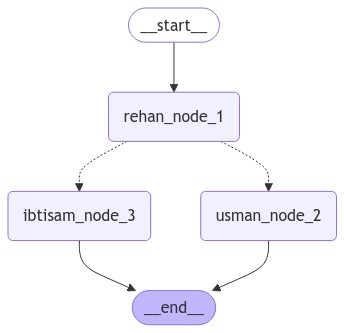

In [ ]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

# Build Graph

# Craete instance of StateGraph class.
builder = StateGraph(State)

# Add Nodes in StateGraph
builder.add_node("rehan_node_1", node_1)
builder.add_node("usman_node_2", node_2)
builder.add_node("ibtisam_node_3", node_3)

# Define Edges.

# Normal Edge: Connects START node with node-1.
builder.add_edge(START, "rehan_node_1")

# Conditional Edge: Decides and connects node-1 with either node-2 or node-3.
# The 'decide_mood' function is used as conditional logic.
builder.add_conditional_edges("rehan_node_1", decide_mood)

# Normal Edges: From 'node-2' and 'node-3' to END node.
builder.add_edge("ibtisam_node_3", END)
builder.add_edge("usman_node_2", END)

# Compile the Graph
graph = builder.compile()

# Display the Graph
display(Image(graph.get_graph().draw_mermaid_png()))


### **5. Graph Invokation:**

In [ ]:
# Invoke the Graph
graph.invoke({"graph_state" : "Hi, this is Rehan."})

--Node-1--
--Decide Moode--
--Node-2--


{'graph_state': 'Hi, this is Rehan. I am sad'}